In [2]:
# Scikit-learn -> sklearn package
#
# Felügyelt tanulás
#     osztályozás
#         előre ismert csoportokba osztás
#         diszkrét halmazból meghatározott célváltozó
#     regresszió
#         folytonos célváltozó
#
#  Algoritumusok
#      döntési fák
#      neurális hálók
#      naiv bayes
#      SVM
#
# Felügyelet nélküli tanulás
#     klaszterezés
#         nincs célváltozó
#         mintázat, csomósodás felfedezése
#         későbbiekre 
# Algoritmusok
#     k-közép

# Kell egy mérték ami megmutatja mennyre jó egy tanulómodell
#  DATA -> TM -> Kiértékelés (Jóság)

# Az egyik felét félrerakom, a másik felére ráeresztem pl a neurális hálót.
# Ha már közben megvan a célváltozó lehet ellenőrizn a jóságot

# Data -> 2 csoport: TRAIN és TEST

In [3]:
#Import
import pandas as pd
import numpy as np
import sklearn as skl
import matplotlib.pyplot as plt
import random

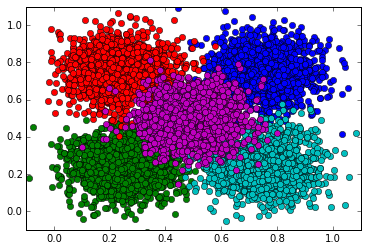

In [20]:
# Nem klasztereztünk, csak adatot generálunk
%matplotlib inline
names = ["x", "y", "class"]
num = 300
data = []
def wn(c):
    return random.gauss(c, 0.10)
for i in xrange(num * 5):
    data.append([wn(0.75), wn(0.75), 0])
    data.append([wn(0.25), wn(0.25), 1])
    data.append([wn(0.25), wn(0.75), 2])
    data.append([wn(0.75), wn(0.25), 3])
    data.append([wn(0.50), wn(0.50), 4])
clustdf = pd.DataFrame(data, columns=names)
for i in set(clustdf["class"]):
    c = clustdf[clustdf["class"] == i]
    plt.plot(c["x"], c["y"], 'o')
plt.axis([-0.1, 1.1, -0.1, 1.1])
plt.show()

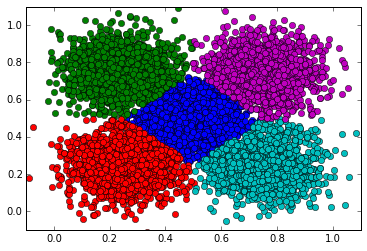

In [21]:
from sklearn.cluster import KMeans

#K-közép algoritmus
# Az algoritmus lelki világa: 
#    egyetlen paraméter: hány csoportot akarunk csinálni
#    beosztja őket amőbákba, majd tovább iterálunk
#    több iterációt is végzünk -> kompaktságot vizsgál
m = KMeans(5)

#Előre jelzek, és elteszem egy atribútumba
clustdf["cluster"] = m.fit_predict(clustdf[["x", "y"]].values)
for i in set(clustdf["cluster"]):
    c = clustdf[clustdf["cluster"] == i]
    plt.plot(c["x"], c["y"], 'o')
plt.axis([-0.1, 1.1, -0.1, 1.1])
plt.show()

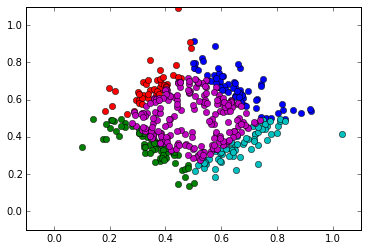

In [25]:
m = KMeans(5, init=np.array([[0.75,0.75],[0.25,0.25],[0.25,0.75],[0.75,0.25],[0.5,0.5]]))

#Előre jelzek, és elteszem egy atribútumba
clustdf["cluster"] = m.fit_predict(clustdf[["x", "y"]].values)
for i in set(clustdf["cluster"]):
    c = clustdf[(clustdf["cluster"] == i) & (clustdf["cluster"] != clustdf['class'])]
    plt.plot(c["x"], c["y"], 'o')
plt.axis([-0.1, 1.1, -0.1, 1.1])
plt.show()

In [30]:
ratio = len(clustdf[(clustdf["cluster"] == clustdf["class"])] ) / float(len(clustdf)) 
print (ratio * 100)

94.1066666667


In [31]:
#Osztályozási
import pandas as pd
import sklearn.cross_validation as xval
import sklearn.datasets as skd
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.metrics import roc_curve as roc
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score as auc_score
from sklearn.metrics import accuracy_score as acc

In [33]:
#Bináris osztályozás: vagy ez, vagy az. Általában ilyenekkel foglalkozunk
X, y = skd.make_classification(n_samples = 1000, n_features=7, n_classes=2, class_sep=0.2)
classdf = pd.DataFrame(X)
classdf["target"] = y
classdf[:5]

0         1         2         3         4         5         6  \
0  0.330809  0.208999  0.044337 -0.281361 -0.108564  0.475079 -1.326108   
1  0.091214 -0.176367 -0.177289 -0.862700 -0.366546 -0.129796  0.734625   
2  0.262772  0.035277 -0.070668  0.500612  0.130351  0.231662  0.642737   
3 -0.375811 -0.554908 -0.307497  1.775832 -0.156887 -0.893541  0.788636   
4 -0.304631  0.230236  0.301518 -0.047545 -0.433358  0.033616  2.547002   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

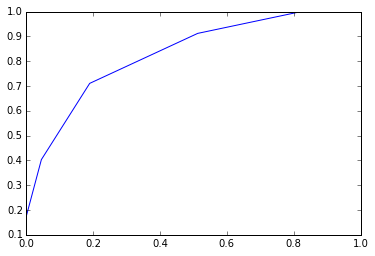

AUC1: 0.828763315053
AUC2: 0.828763315053
ACC: 0.76


In [35]:
#knn az osztályozó algoritmus. Eléggé hasonlít a k-középhez
#k db legközelebbi darab (nearest neighbour)
#nem szerencsés a páros, mert akkor lehet döntetlen 
# k ideális értéke attól függ, hogy hány adatom van
m = knn(5)
# Véletlen se vegyük be a magyarázó változók közé a célváltozót, különben csúnyán ráfázhatunk
m.fit(classdf.drop("target", axis=1), classdf["target"])
pred = m.predict(classdf.drop("target", axis=1))
prob = m.predict_proba(classdf.drop("target", axis=1))[:,1]

#Kető fontos jósági érték:
#   fpr - false positive rate
#   tpr - true positive rate
fpr, tpr, thresholds = roc(classdf["target"], prob)
plt.plot(fpr, tpr)
plt.show()

#AUC - Area Under Curve - Minél nagyobb, annál jobb nekünk
print("AUC1: " + str(auc(fpr, tpr)))
print("AUC2: " + str(auc_score(classdf["target"], prob)))
#ACC - ACCuracy
print("ACC: " + str(acc(pred, classdf["target"])))
#Hiba -> error rate, minimalizálni szeretnénk

In [ ]:
#Mindig legyen mindent véletlen, mert annak nincsenek prekoncepciói...